In [1]:
import os
import pickle
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
load_dir = './Pickle'

pickle_in = open(os.path.join(load_dir, "categories.pickle"), "rb")
categories = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_train.pickle"), "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_train.pickle"), "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_valid.pickle"), "rb")
X_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_valid.pickle"), "rb")
y_valid = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_test.pickle"), "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_test.pickle"), "rb")
y_test = pickle.load(pickle_in)

In [3]:
# Normalize image data (X)
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# Convert labels (y) to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=4)
y_valid = to_categorical(y_valid, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


In [4]:
from tensorflow.keras.applications import ResNet50


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  
    layers.Dense(128, activation='relu'),  
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  
])


In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)


In [6]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5, restore_best_weights=True)

h = model.fit(x=X_train, y=y_train, batch_size=128, epochs=20, validation_data=(X_valid, y_valid), callbacks=[cb], verbose=1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - accuracy: 0.2423 - loss: 1.7936 - val_accuracy: 0.2448 - val_loss: 1.3849
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.2307 - loss: 1.7034 - val_accuracy: 0.2500 - val_loss: 1.3860
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.3004 - loss: 1.6337 - val_accuracy: 0.3333 - val_loss: 1.3772
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.2309 - loss: 1.6067 - val_accuracy: 0.2760 - val_loss: 1.3769
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.2563 - loss: 1.5664 - val_accuracy: 0.2500 - val_loss: 1.3690
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.2444 - loss: 1.5916 - val_accuracy: 0.3385 - val_loss: 1.3639
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.2471 - loss: 1.5349 - val_accuracy: 0.2552 - val_loss: 1.3606
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.2885 - loss: 1.4427 - val_accuracy: 0.5677 - val_loss: 1.3548
Epoch 9/

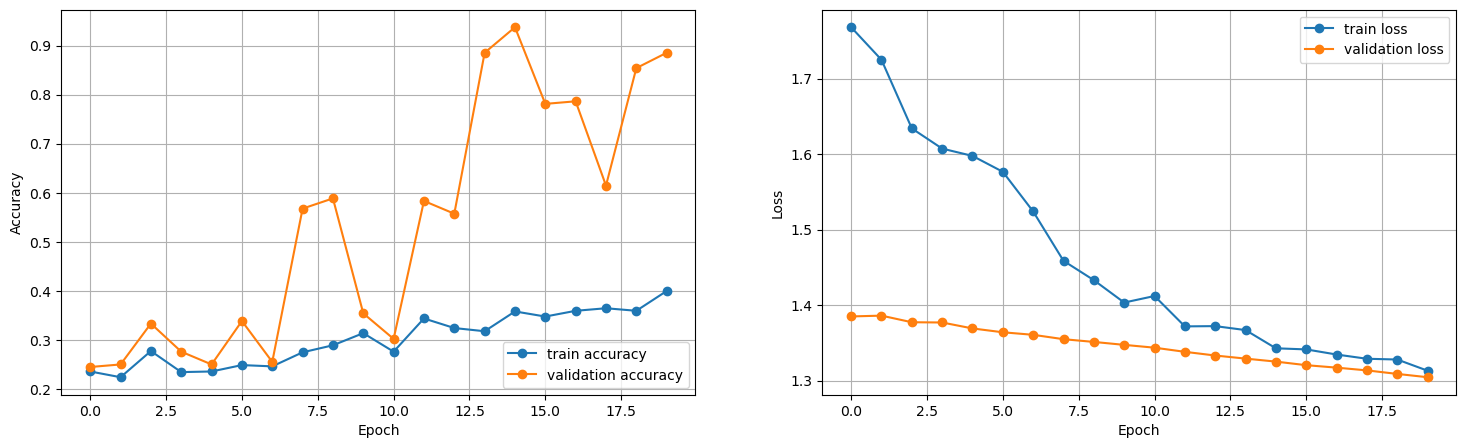

In [7]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9004 - loss: 1.3001

Test Accuracy: 0.8791666626930237

Test Loss: 1.3032342195510864


In [9]:
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


In [10]:
model_path = './Pickle'

model.save(os.path.join(model_path, "resnet50.h5"))

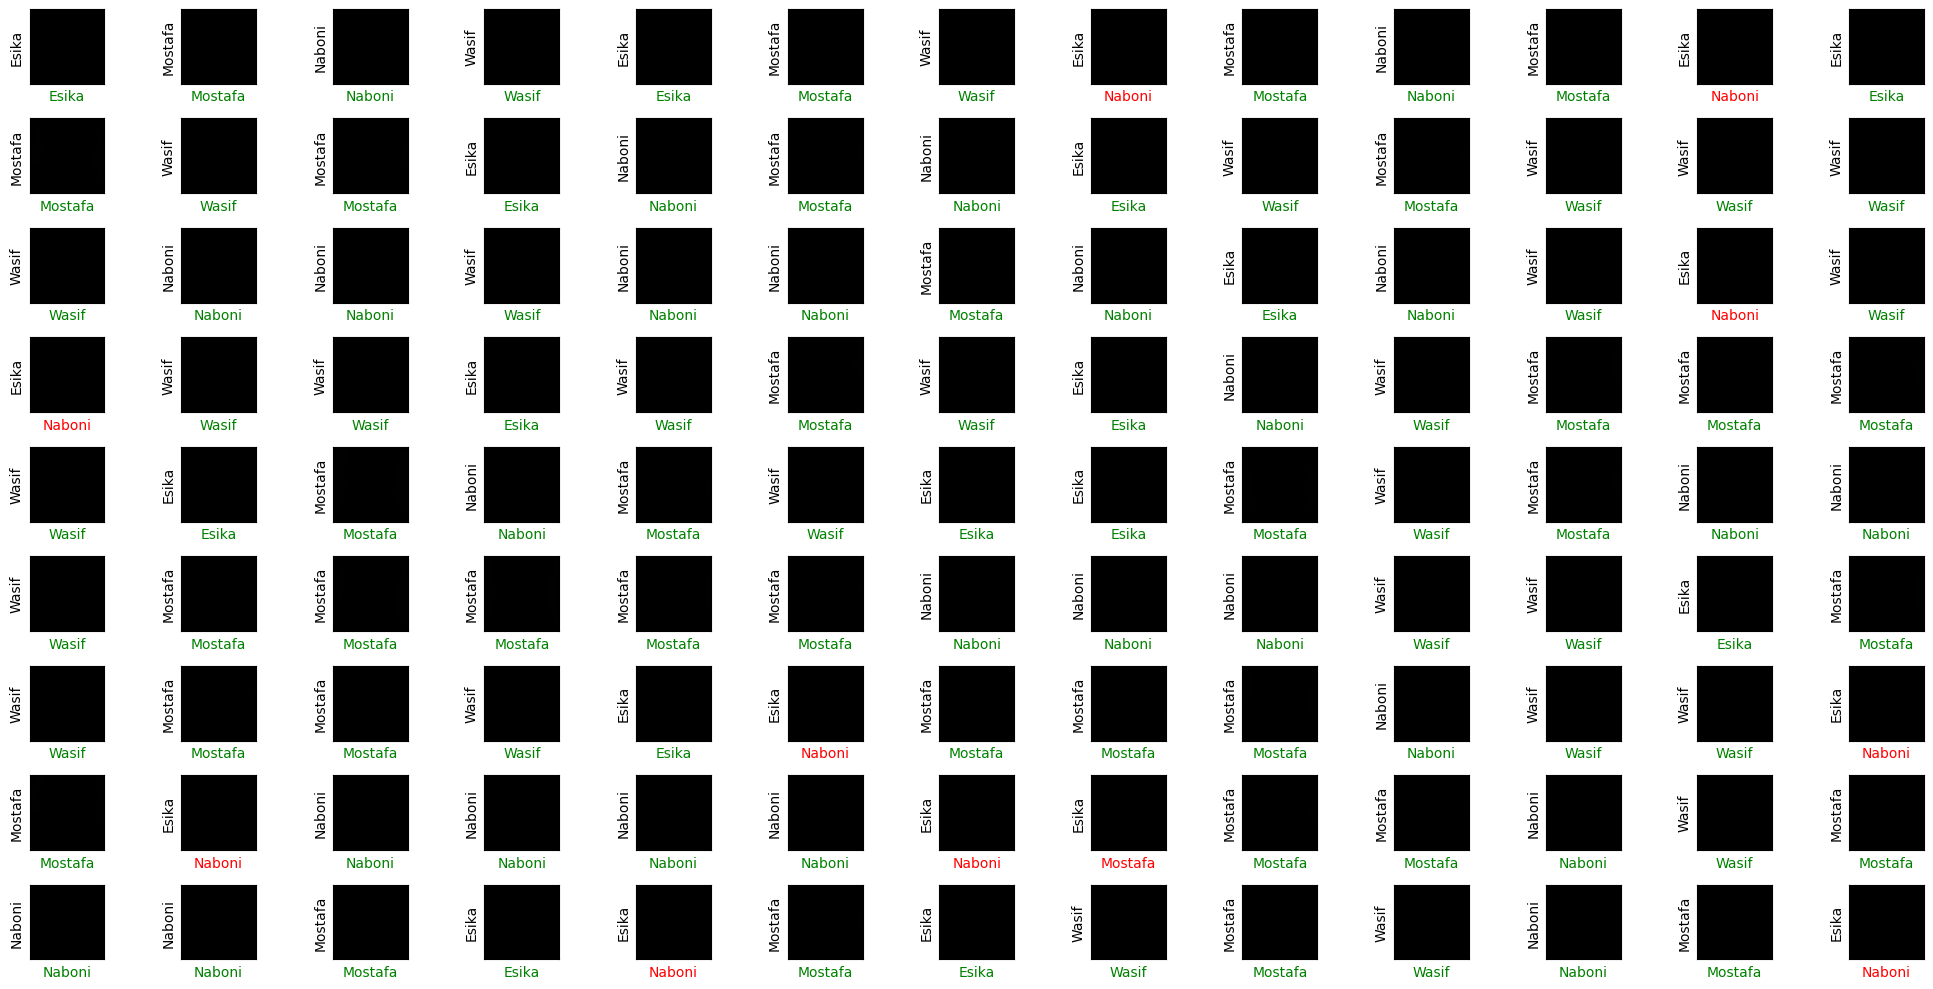

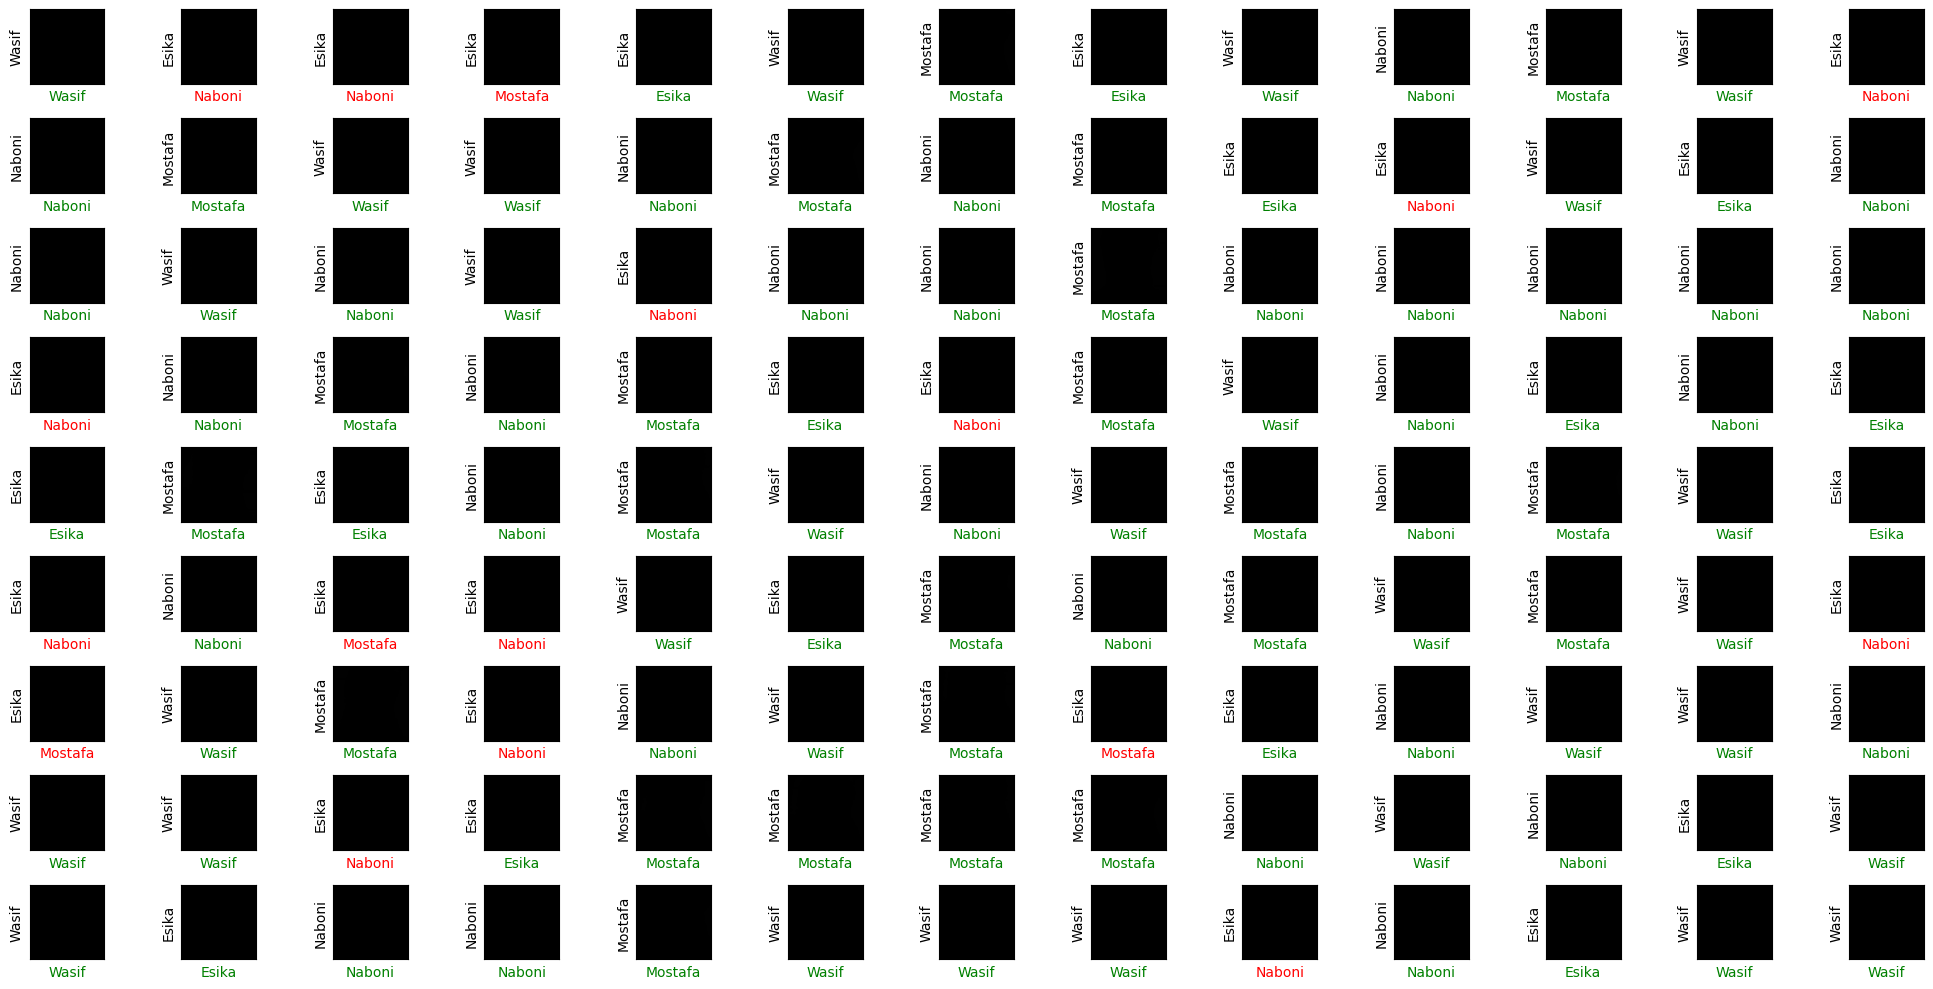

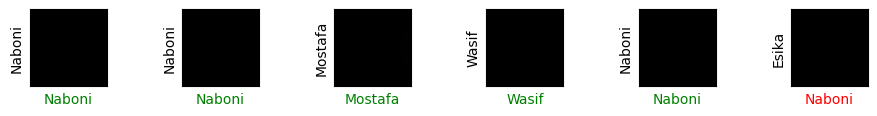

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Configuration
max_per_plot = 117  # Maximum number of subplots in one figure (9x13 grid)
num_plots = (len(X_test) + max_per_plot - 1) // max_per_plot  # Total number of figures needed

# Loop through batches of images
for plot_idx in range(num_plots):
    plt.figure(figsize=(20, 10))  # Create a new figure
    start = plot_idx * max_per_plot  # Start index for this batch
    end = min((plot_idx + 1) * max_per_plot, len(X_test))  # End index for this batch

    for i, idx in enumerate(range(start, end)):
        plt.subplot(9, 13, i + 1)  # Create subplot
        plt.imshow(X_test[idx].astype(np.uint8))  # Display image
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
        plt.ylabel(categories[np.argmax(y_test[idx])])  # Fixed: Convert one-hot label to integer

        # Display predicted label with color coding
        if np.argmax(y_test[idx]) == np.argmax(predictions[idx]):  # Fixed: Convert one-hot to integer
            plt.xlabel(categories[np.argmax(predictions[idx])], color='g')  # Green for correct prediction
        else:
            plt.xlabel(categories[np.argmax(predictions[idx])], color='r')  # Red for incorrect prediction

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the figure
